# Прогнозирование оттока клиентов сети фитнес-центров

---

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-определение-функций-проекта" data-toc-modified-id="Импорт-библиотек-и-определение-функций-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек и определение функций проекта</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Функции-загрузки-и-обзора-данных" data-toc-modified-id="Функции-загрузки-и-обзора-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции загрузки и обзора данных</a></span></li><li><span><a href="#Функция-визуализации-распределений" data-toc-modified-id="Функция-визуализации-распределений-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Функция визуализации распределений</a></span></li><li><span><a href="#Функция-визуализации-метрик-классификации" data-toc-modified-id="Функция-визуализации-метрик-классификации-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Функция визуализации метрик классификации</a></span></li></ul></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Первичная-предобработка-данных" data-toc-modified-id="Первичная-предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Первичная предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#EDA.-Исследование-данных" data-toc-modified-id="EDA.-Исследование-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA. Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Прогнозирование-оттока-клиентов" data-toc-modified-id="Прогнозирование-оттока-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Прогнозирование оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов-сети" data-toc-modified-id="Кластеризация-клиентов-сети-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кластеризация клиентов сети</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод-исследования-и-рекомендации" data-toc-modified-id="Общий-вывод-исследования-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод исследования и рекомендации</a></span></li></ul></div>

---

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённой проблемой фитнес-клубов является отток клиентов. Под оттоком клиентов будем понимать ситуацию, если клиент за последний месяц ни разу не посетил спортзал: если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

На основе данных множества клиентских анкет, переведённых в электронный вид, требуется провести анализ и подготовить план действий по удержанию клиентов.

**В ходе исследования предполагается:**
- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: 
    - выделить несколько наиболее ярких групп,
    - охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - целевые группы клиентов;
    - меры по снижению оттока;
    - другие особенности взаимодействия с клиентами.

**Исходные данные представлены в файле:** `gym_churn.csv`.

---

## Импорт библиотек и определение функций проекта

### Импорт библиотек

In [1]:
import os
import pandas as pd
import numpy as np

# библиотеки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# вспомогательные функции ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# функции классификации
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# функции кластеризации
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# метрики классификации
from sklearn.metrics import accuracy_score, precision_score, recall_score

# метрики кластеризации
from sklearn.metrics import silhouette_score

### Функции загрузки и обзора данных

In [2]:
# определение кроссплатформенной функции загрузки данных
# ======================================================
# на вход подаётся:
#     file_name - имя файла
# на выходе - датафрейм с загруженными данными
# ======================================================
def open_file(file_name, sep=','):
    pth1 = '/datasets/' + file_name             # яндексовский путь
    pth2 = os.path.join('datasets', file_name)  # мой путь
    
    if os.path.exists(pth1):
        return pd.read_csv(pth1, sep=sep)
    elif os.path.exists(pth2):
        return pd.read_csv(pth2, sep=sep)
    else:
        print("ERROR: Neither Yandex nor local path is reacable...")
    
    return pd.DataFrame() # в случае ошибки чтения вернём пустой DataFrame

In [3]:
# определение функции обзора данных
# ===============================================
# на вход подаётся датафрейм df
# на выходе:
#     - 10 случайных строк df
#     - информация df.info()
#     - количество явных дубликатов в строках df
#     - процент пропусков данных в столбцах df
# ===============================================
def data_observe(df):
    row_num = 5    # количество отображаемых строк таблицы
    
    print('Размерность данных (row, col):', df.shape)
    print('============================\n')
    
    print('Произвольные строки таблицы:')
    print('============================')
    if len(df) >= row_num:
        display(df.sample(row_num))
    else:
        display(df)

    print('\nИнформация о таблице:')
    print('=====================')
    df.info()
    
    print('\nКоличество явных дубликатов в таблице:')
    print('======================================')
    print(df.duplicated().sum())
    
    print('\nПроцент пропусков в столбцах:')
    print('=============================')
    display(pd.DataFrame(
                round((df.isna().mean()*100),2), columns=['NaNs, %'])
                .sort_values(by='NaNs, %', ascending=False
            )
        .style.format('{:.2f}')
        .background_gradient('coolwarm')
    )

### Функция визуализации распределений

In [4]:
# определение функции визуализации распределений
# ======================================================
def show_distribution(df, col, hue, multiple='layer', discrete=False, figsize=(15, 5)):
   # задаём размер сетки для графиков
    plt.figure(figsize=figsize)

    # в таблице графиков — 2 столбца и 1 строка (отток - нет оттока)
    # 1. в первой строим гистограммы распределения ушедших 
    # и оставшихся пользователей
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(
        data=df,
        x=col,
        hue=hue,
        discrete=True,
        multiple=multiple,
        alpha=0.3,
        ax=ax1
    )
    ax1.set_title('Гистограммы распределения признака ' + col)
    ax1.set_xlabel('Признак ' + col)
    ax1.set_ylabel('Количество')

    # 2. во второй строим плотность (kde) распределения ушедших 
    # и оставшихся пользователей
    ax2 = plt.subplot(1, 2, 2)
    sns.kdeplot(
        data=df,
        x=col,
        hue=hue,
        ax=ax2
    )
    ax2.set_title('Плотность распределения признака ' + col)
    ax2.set_xlabel('Признак ' + col)
    ax2.set_ylabel('Плотность')

    plt.tight_layout()
    plt.show() 

### Функция визуализации метрик классификации

In [5]:
# определение функции визуализации метрик классификации
# ======================================================
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

---

## Обзор данных

Откроем и изучим файл `gym_churn.csv`:

In [6]:
gym_churn = open_file('gym_churn.csv')
if not gym_churn.empty:
    data_observe(gym_churn)

Размерность данных (row, col): (4000, 14)

Произвольные строки таблицы:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1563,1,1,1,0,1,1,0,26,67.528750,1.0,4,1.020726,1.268031,1
2825,1,0,1,0,1,1,0,27,37.401690,1.0,3,2.108084,1.092014,1
3660,0,0,1,0,1,6,1,31,83.385047,6.0,8,2.439404,2.322534,0
1780,0,1,1,0,1,1,0,32,152.568708,1.0,4,1.293132,1.448959,0
1018,0,1,1,1,1,12,0,28,84.891216,11.0,1,2.816749,2.767973,0



Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total        

,"NaNs, %"
gender,0.00
Near_Location,0.00
Partner,0.00
Promo_friends,0.00
Phone,0.00
Contract_period,0.00
Group_visits,0.00
Age,0.00
Avg_additional_charges_total,0.00
Month_to_end_contract,0.00


Таблица `gym_churn` состоит из 4000 строк, 14 столбцов. Типы данных в столбцах - float64, int64 - все столбцы числовые.

Согласно описанию данных, в столбцах хранятся:
1. Данные клиента за предыдущий до проверки факта оттока месяц:
    - `'gender'` — пол;
    - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
    - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент);
    - `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - `'Phone'` — наличие контактного номера телефона;
    - `'Age'` — возраст;
    - `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    - `'Group_visits'` — факт посещения групповых занятий;
    - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
3. `'Churn'` — факт оттока в текущем месяце.

Столбцы поименованы в смешаном стиле. Целесообразно переименовать их в стиле snake_case.

Предварительно, данные выглядят полными - в таблице отсутствуют явные дубликаты и пропуски.

### Выводы

1. Предварительно, данные выглядят полными - в таблице отсутствуют явные дубликаты и пропуски.


2. Все 14 столбцов - числовые, не требуется перевод категориальных данных в числовые в случае использования машинного обучения.


3. Целесообразно переименовать столбцы в стиле snake_case.


4. На этапе EDA целесообразно оценить диапазоны значений в столбцах и, возможно, изменить их тип для экономии памяти и ускорения вычислений.


5. Отдельно следует рассмотреть значения в столбце `'Month_to_end_contract'`, который по своей природе должен быть целочисленным, а также изучить природу значений столбцов `'Avg_class_frequency_total'` и `'Avg_class_frequency_current_month'` на предмет правильного определения типа.

---

## Первичная предобработка данных

Приведём названия столбцов к стилю snake_case:

In [7]:
# переименование столбцов
gym_churn.columns = gym_churn.columns.str.lower()
# проверка результата
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Рассмотрим различные значения в столбцах `'month_to_end_contract'`, `'avg_class_frequency_total'` и `'avg_class_frequency_current_month'`:

In [8]:
cols = ['month_to_end_contract', 'avg_class_frequency_total', 
        'avg_class_frequency_current_month']

for col in cols:
    print(col, ':')
    print(gym_churn[col].sort_values().unique())

month_to_end_contract :
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
avg_class_frequency_total :
[0.00000000e+00 2.76039295e-03 6.43569613e-03 ... 5.41005446e+00
 5.42189771e+00 6.02366848e+00]
avg_class_frequency_current_month :
[0.00000000e+00 2.87236242e-03 3.27356568e-03 ... 5.36841531e+00
 5.45829466e+00 6.14678288e+00]


### Выводы

1. Столбцы поименованы корректно в хорошем стиле snake_case.


2. Столбец `'month_to_end_contract'` имеет целочисленную природу. Целесообразно привести к целочисленному типу.


3. Столбцы `'avg_class_frequency_total'` и `'avg_class_frequency_current_month'` имеют вещественную природу.

---

## EDA. Исследование данных

Изучим данные, на которых предполагается строить прогноз оттока клиентов фитнес-центров:
- рассмотрим средние значения и стандартные отклонения признаков;
- сравним средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- визуализируем распределения признаков для клиентов, попавших и не попавших в отток;
- построим матрицу корреляций признаков.

Как уже было отмечено на этапе обзора, в таблице отсутствуют пропуски, можно считать данные полными.

Охарактеризуем признаки:

In [9]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Кроме того, рассмотрим возможные значения для целочисленных признаков - в силу своей природы они должны быть ограничены:

In [10]:
int_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 
            'contract_period', 'group_visits', 'age', 'lifetime', 'churn',
            'month_to_end_contract']

for col in int_cols:
    print(col, ':')
    print(gym_churn[col].sort_values().unique())

gender :
[0 1]
near_location :
[0 1]
partner :
[0 1]
promo_friends :
[0 1]
phone :
[0 1]
contract_period :
[ 1  6 12]
group_visits :
[0 1]
age :
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41]
lifetime :
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 29 31]
churn :
[0 1]
month_to_end_contract :
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


Итак, мы имеем данные о посетителях сети в возрасте от 18 до 41 года (за исключением 40-летних), впервые пришедших в клуб не далее 2 лет тому назад. Большая часть признаков (gender, near_location, partner, promo_friends, phone group_visits, churn) - бинарные индикаторы, принимающие значения 0 и 1.

**Замечание:** в описании исходных данных отсутствуют правила интерпретации бинарных индикаторов. Наиболее остро данная проблема стоид для индикатора пола клиента (женский-мужской). В остальных случаях из общих соображений целесообразно считать наличие факта за 1, его отсутствие - 0.

***Следует уточнить у заказчика правило интерпретации бинарного признака "пол клиента".***

Для определённости при дальнейших рассуждениях будем полагать, что:
- мужской пол обозначен 1;
- женский пол обозначен 0.

В принятых обозначениях можно считать, что:
- среди посетителей фитнес-клубов в среднем примерно одинаковое количество мужчин (примерно 51%) и женщин;
- большинство из них (примерно 84.5%) проживают или работают в районе, где находится фитнес-центр;
- около половины (примерно 48.7%) - сотрудники компаний-партнёров клуба;
- около трети (30.85%) зарегистрировались в рамках акции «приведи друга»;
- большинство (свыше 90%) оставили контактный номер телефона;
- средняя длительность абонемента порядка 4.68 масяца говорит о том, что большинство клиентов покупают короткие (на месяц) абонементы (в случае равномерного распределения среднее приближалось бы к 6.3, к случае преобладания длинных абонементов - к болшим величинам);
- около 41% клиентов посещали групповые занятия (нужно проверить корреляцию с полом клиентов - женщины чаще посещают групповые занятия);
- средний возраст клиента - 29 лет;
- 75% клиентов дополнительно тратят на прочие услуги не более 211 у.е., остальные - до 553 у.е.;
- среднее количество месяцев до конца абонемента равно 4.3, при этом у половины клиентов эта величина не превышает 1, что дополнительно свидетельствует о том, что посетители предпочитают короткие абонементы;
- средний lifetime составляет около 4 месяцев, при этом 75% клиентов зарегистрировались менее полугода назад;
- средняя частота посещений в месяц за весь период и за последний месяц примерно совпадают - около 2 раз в неделю, при этом 75% клиентов посещают клуб не более 3 раз,
- за период наблюдений отток клиентов составил около 26.5%.

Стандартное отклонение всех параметров сравнительно невелико, что может свидетельствовать о небольшом разбросе значений признаков.

Заметим также, что все числовые столбцы таблицы можно привести к соответствующему 32-битному типу для экономии памяти:

In [11]:
float_cols = ['avg_additional_charges_total', 'avg_class_frequency_total', 
              'avg_class_frequency_current_month']

for col in int_cols:
    gym_churn[col] = gym_churn[col].astype('int32')
for col in float_cols:
    gym_churn[col] = gym_churn[col].astype('float32')

gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int32  
 1   near_location                      4000 non-null   int32  
 2   partner                            4000 non-null   int32  
 3   promo_friends                      4000 non-null   int32  
 4   phone                              4000 non-null   int32  
 5   contract_period                    4000 non-null   int32  
 6   group_visits                       4000 non-null   int32  
 7   age                                4000 non-null   int32  
 8   avg_additional_charges_total       4000 non-null   float32
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int32  
 11  avg_class_frequency_total          4000 non-null   float

Посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался:

In [12]:
gym_churn.groupby(by='churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445709,115.082901
month_to_end_contract,5.283089,1.662582


На основе усреднённых данных, сгруппированных по признаку оттока, можно заключить, что более лояльны клиенты:
- проживающие или работающие в районе расположения клуба;
- пришедшие в клуб "от друзей" или являющиеся сотрудниками компаний-партнёров;
- покупающие долгосрочные (от полугода) абонементы;
- посещающие групповые занятия;
- сравнительно давно (от 5 месяцев) являющиеся клиентами клуба;
- более активно покупающие дополнительные услуги;
- посещающие занятия в среднем не менее 2 раз в неделю.

Кроме того средний возраст лояльных клиентов выше - 30 лет против 27 у попавших в отток.

Остальные признаки не сильно различаются между группами.

Посмотрим на распределения признаков отдельно для тех, кто ушёл, и тех, кто остался:

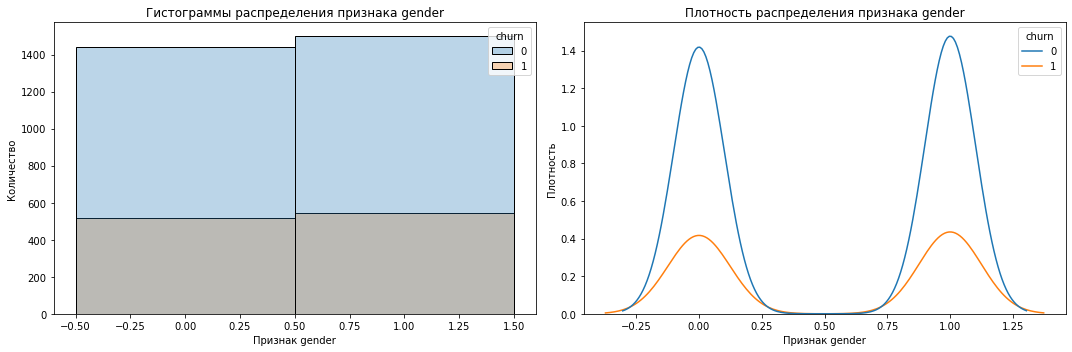

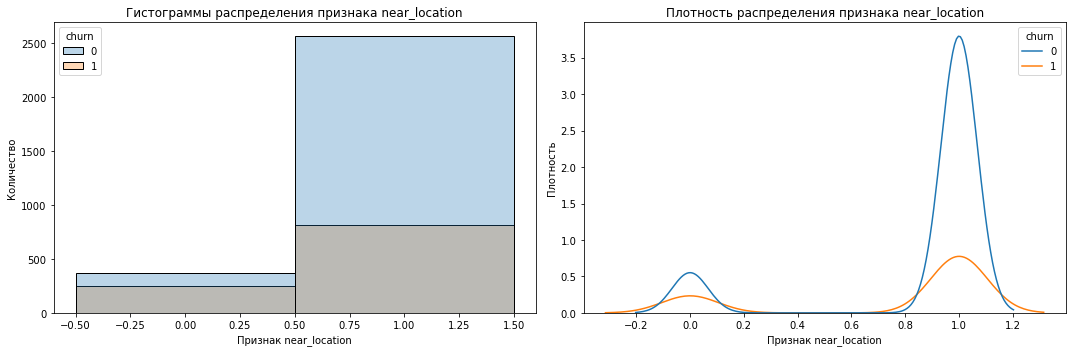

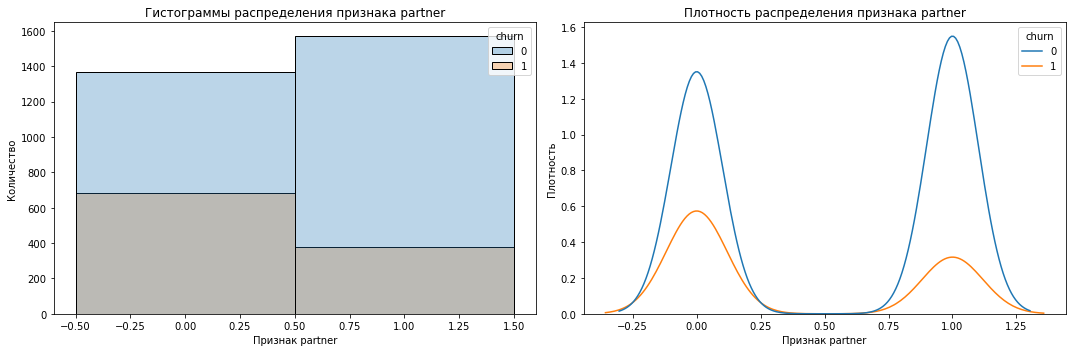

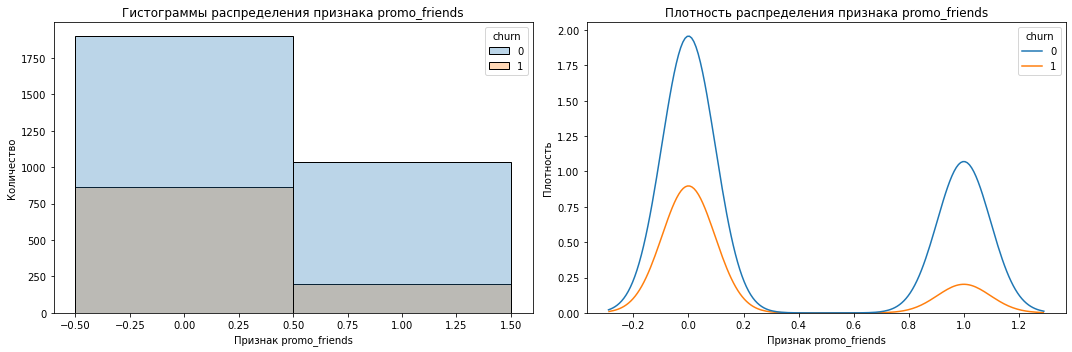

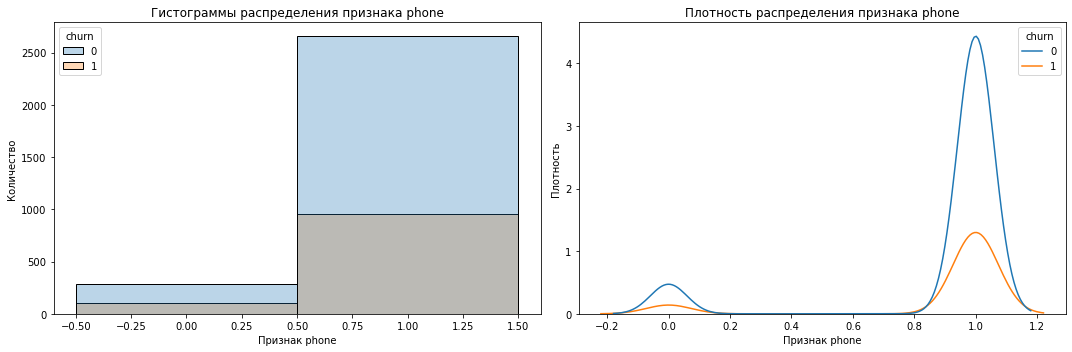

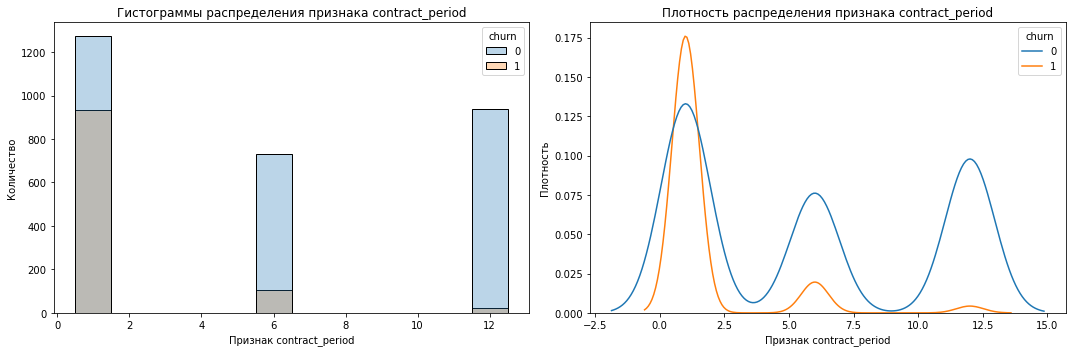

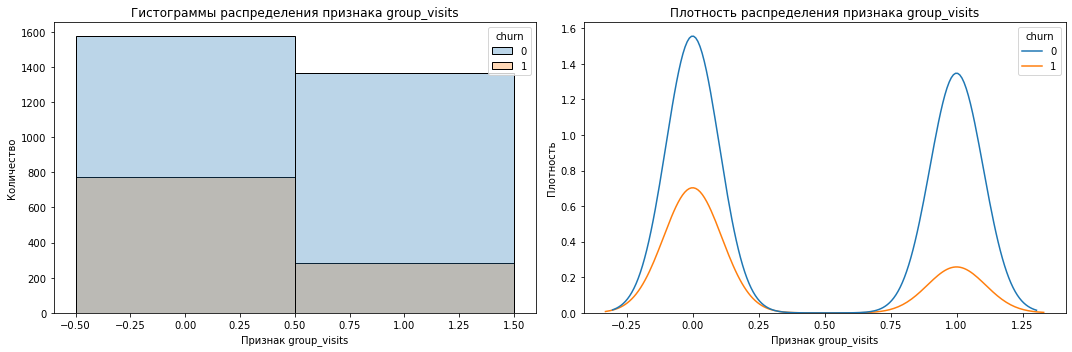

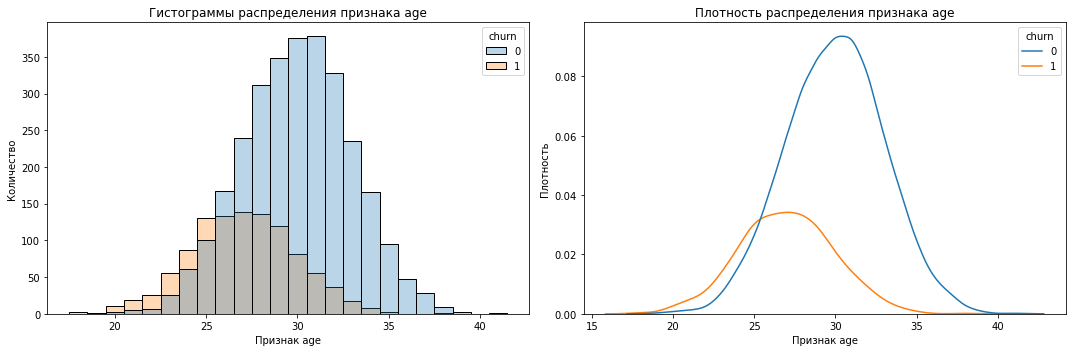

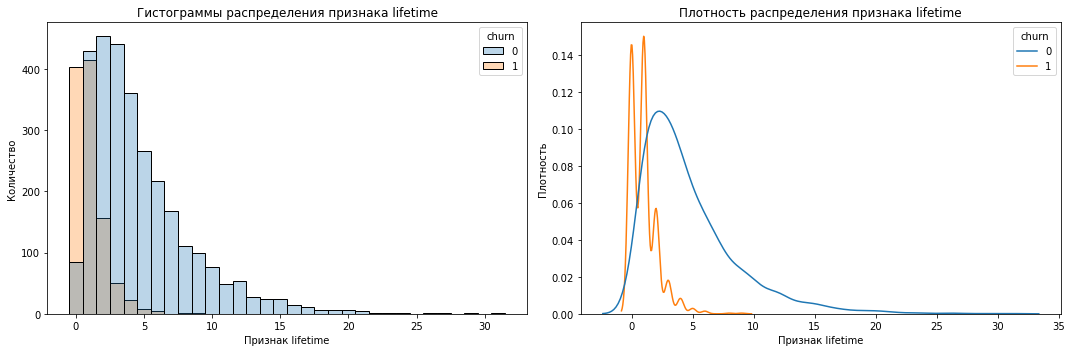

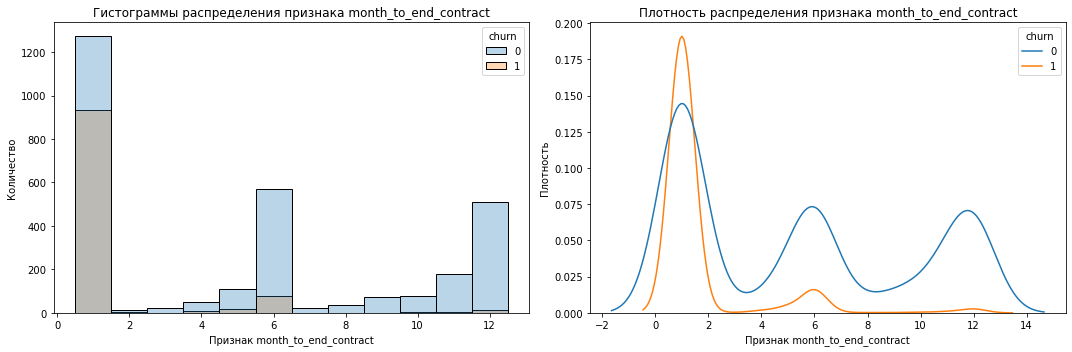

In [13]:
discrete_features = ['gender', 'near_location', 'partner', 'promo_friends', 
                     'phone', 'contract_period', 'group_visits', 'age', 
                     'lifetime', 'month_to_end_contract']

for feature in discrete_features:
    show_distribution(gym_churn, col=feature, hue='churn', discrete=True, 
                      figsize=(15, 5))

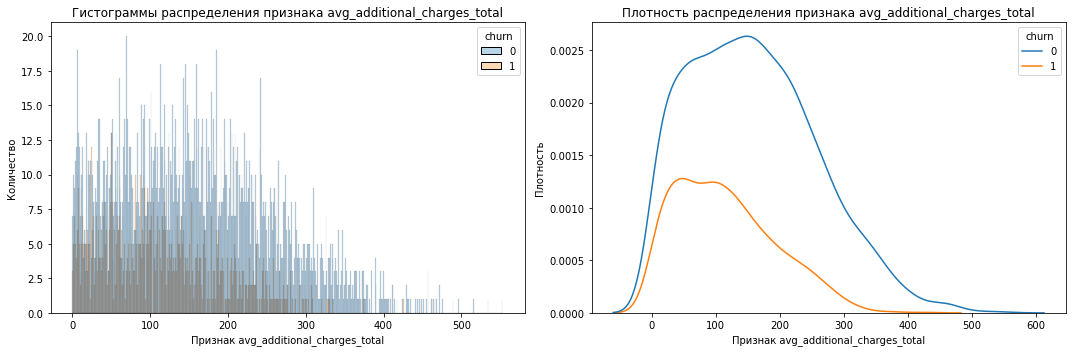

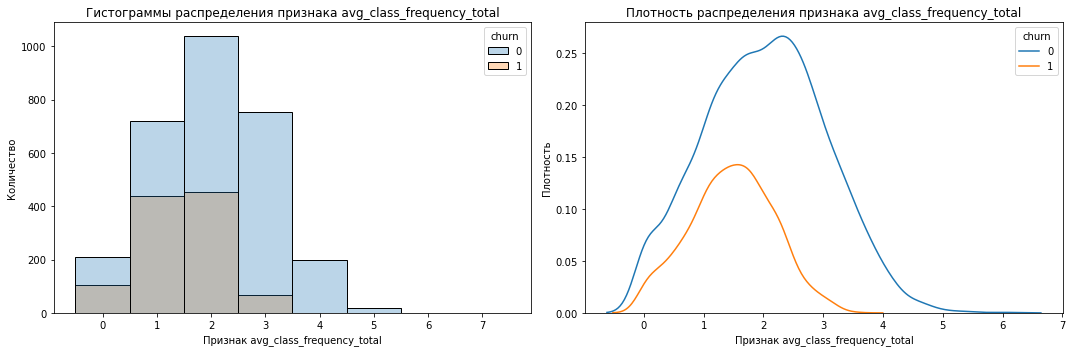

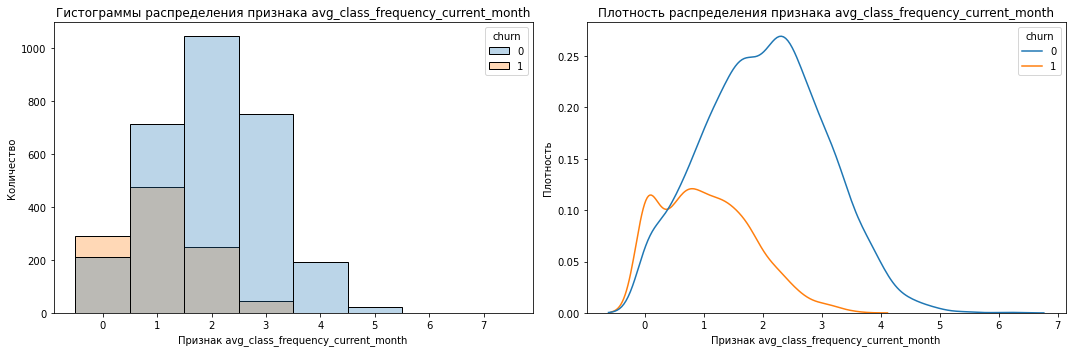

In [14]:
float_features = ['avg_additional_charges_total', 
                       'avg_class_frequency_total',
                       'avg_class_frequency_current_month']

for feature in float_features:
    show_distribution(gym_churn, col=feature, hue='churn',
                      discrete=False, figsize=(15, 5))

Гистограммы и графики плотности распределений признаков подтверждают сделанные ранее предположения о лояльности пользователей. Чаще уходят в отток пользователи:
- не работающие в компаниях-партнёрах и не пришедшие по программе "приведи друга";
- купившие абонемент на 1 месяц;
- не посещающие групповые занятия;
- пришедшие в клуб до полугода тому назад;
- имеющие оставшийся срок абонемента - 1 месяц.

При этом такие пользователи в среднем моложе, меньше тратят на дополнительные услуги и реже занимаются в течение недели.

Суммируя вказанное выше, ***наиболее часто уходят в отток те клиенты, которые недавно пришли самостоятельно в клуб "попробовать свои силы" в течение месяца***.

Построим матрицу корреляций признаков и отобразим её в виде тепловой карты:

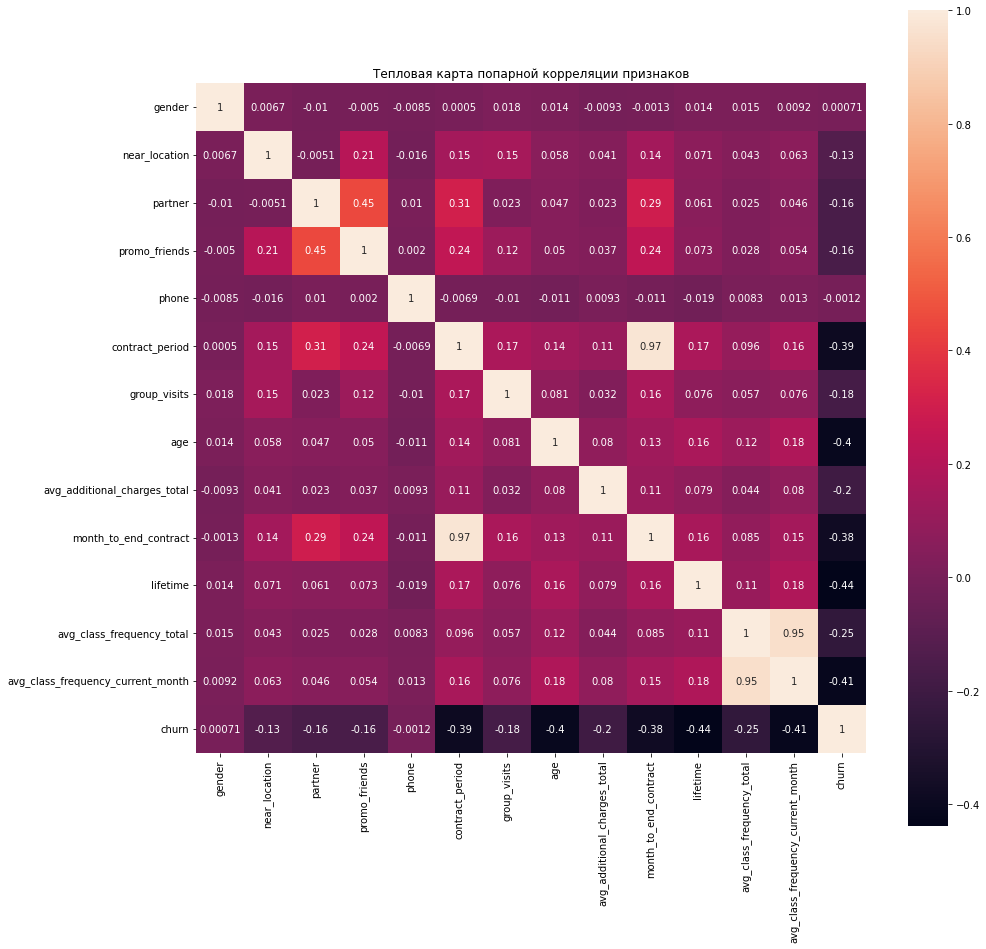

In [15]:
# рассчитаем  матрицу корреляций
gym_churn_corr = gym_churn.corr()

# построим тепловую карту
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    gym_churn_corr, annot=True, square=True
)

ax.set_title('Тепловая карта попарной корреляции признаков')
plt.show()

Тепловая карта попарной корреляции признаков наглядно демонстрирует, что ни один из них не коррелирует в значительной степени с целевой переменной `churn`. При этом можно заметить, что имеет место ***определённая (в районе -0.4) обратная корреляция*** `churn` с признаками:
- `contract_period` - длительность абонемента;
- `age` - возраст клиента;
- `month_to_end_contract` - количество месяцев до конца абонемента;
- `lifetime` - длительность членства в клубе;
- `avg_class_frequency_current_month` - среднее количество тренировок в неделю за последний месяц.

Это позволяет предположить, что именно эти признаки в наибольшей степени определяют вероятность оттока конкретного клиента.

В то же время необходимо отметить, что наблюдается достаточно сильная взаимная корреляция между следующими парами признаков:
- `contract_period-month_to_end_contract` (97%);
- `avg_class_frequency_total-avg_class_frequency_current_month` (95%).

При обучении попробуем удалить из набора признаков дублирующие `month_to_end_contract` и `avg_class_frequency_total` (они слабее коррелируют с целевым признаком) и проверим, как это отразится на качестве моделей.

### Выводы

В процессе исследовательского анализа данных получены следующие результаты:


1. Значения в столбцах приведены к правильным 32-битным типам для экономии памяти.


2. На основе анализа статистических метрик и распределений признаков получены следующие усреднённые "портреты":
    1. ***Лояльных клиентов***
        - проживают или работают в районе расположения клуба;
        - пришли в клуб "от друзей" или являются сотрудниками компаний-партнёров;
        - покупают долгосрочные (от полугода) абонементы;
        - посещают групповые занятия;
        - сравнительно давно (от 5 месяцев) являются клиентами клуба;
        - более активно покупают дополнительные услуги;
        - посещают занятия в среднем не менее 2 раз в неделю;
        - средний возраст лояльных клиентов - 30 лет.
    2. ***Клиентов с повышенной вероятностью оттока***
        - чаще не работают в компаниях-партнёрах и/или не пришли по программе "приведи друга";
        - купили абонемент на 1 месяц;
        - редко посещают групповые занятия;
        - пришли в клуб до полугода тому назад;
        - имеют оставшийся срок абонемента - 1 месяц;
        - средний возраст клиентов, попавших в отток - 27 лет.


3. На основе анализа тепловой карты попарной корреляции признаков можно заключить, что ни один из них не коррелирует в значительной степени с целевой переменной `churn`.


4. Имеет место ***определённая (в районе -0.4) обратная корреляция*** `churn` с признаками:
    - `contract_period` - длительность абонемента;
    - `age` - возраст клиента;
    - `month_to_end_contract` - количество месяцев до конца абонемента;
    - `lifetime` - длительность членства в клубе;
    - `avg_class_frequency_current_month` - среднее количество тренировок в неделю за последний месяц.

Предположительно, именно эти признаки в наибольшей степени определяют вероятность оттока конкретного клиента.


5. Наблюдается достаточно сильная взаимная корреляция между следующими парами признаков:
- `contract_period-month_to_end_contract` (97%);
- `avg_class_frequency_total-avg_class_frequency_current_month` (95%).

При обучении попробуем удалить из набора признаков дублирующие `month_to_end_contract` и `avg_class_frequency_total` (они слабее коррелируют с целевым признаком) и проверим, как это отразится на качестве моделей.


***Несмотря на то, что в ходе EDA признак `gender` не продемонстрировал существенного влияния на отток клиентов, целесообразно уточнить у заказчика правило его интерпретации.***

---

## Прогнозирование оттока клиентов

Как следует из результатов EDA, не существует очевидной зависимости целевого признака - факта оттока пользователя - от одного или нескольких других наблюдаемых признаков. Поэтому для прогнозирования оттока клиентов из сети фитнес-центров воспользуемся методами машинного обучения.

Требуется решить задачу ***бинарной классификации клиентов***. Целевым признаком является ***факт оттока клиента в следующем месяце***.

Для обучения и тестирования модели ***используем случайное (random) разбиение на обучающую и валидационную выборки***, поскольку в данных не наблюдается временная зависимость.

Выберем метрики, по которым будем оценивать модели. Для оценки и сравнения различных моделей бинарной классификации ***воспользуемся стандартными метриками классификации***:
- `accuracy` - доля правильных ответов;
- `precision` - точность, доля правильных ответов только среди целевого класса;
- `recall` - полнота, доля обнаруженных реальных объектов целевого класса.

С точки зрения бизнеса ***наиболее приоритетной следует считать метрику `precision`***, поскольку владельцам сети не интересно вкладывать деньги в удержание клиентов, которых модель ложно определит в отток.

Выберем ***модели для решения задачи бинарной классификации***:
1. Наиболее простой моделью является "логистическая регрессия" (Logistic Regression).
2. Альтернативой рассмотрим модель "случайного леса" (Random Forest) на основе деревьев принятия решений - более сильного классификатора.

Итак, модели и метрики выбраны. Приступим к разбиению выборки, обучению и валидации моделей:

In [16]:
# определим соотношение классов "отток" - "не отток"
gym_churn['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Соотношение классов - примерно 1 к 3. Классы не сбалансированы. Метрика `accuracy` в этой ситуации может оказаться не показательной. Будем иметь это ввиду.

In [17]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку
# стратифицируем её, обеспечив одинаковое распределение 
# целевого признака в обучающей и валидационной выборке
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

Поскольку значения признаков заданы в разном масштабе, выполним процедуру стандартизации:

In [18]:
# стандартизируем признаки
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Перейдём к обучению и валидации выбранных моделей классификации:

In [19]:
# обучение и валидация модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predicted = lr_model.predict(X_test_st)
lr_proba = lr_model.predict_proba(X_test_st)[:, 1]

In [20]:
# обучение и валидация модели случайного леса
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.zit(X_train_st, y_train)
rfc_predicted = rfc_model.predict(X_test_st)
rfc_proba = rfc_model.predict_proba(X_test_st)[:, 1]

Оценим результаты валидации использованных моделей с помощью метрик:

In [21]:
print_all_metrics(y_test, lr_predicted, lr_proba, 
                  title='Метрики классификации для модели Логистической Регресии:')
print_all_metrics(y_test, rfc_predicted, rfc_proba, 
                  title='Метрики классификации для модели Случайного Леса:')

Метрики классификации для модели Логистической Регресии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
Метрики классификации для модели Случайного Леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


Метрики свидетельствуют, что ***лучше с задачей предсказания оттока пользователей справилась модель логистической регрессии***: данная модель демонстрирует большую точность и полноту.

Однако у нас есть мультиколлинеарные признаки. Попробуем удалить их (по отдельности и все вместе), перобучить модели изаново оценить их качество:

In [22]:
# удалим month_to_end_contract
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(['churn', 'month_to_end_contract'], axis=1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку
# стратифицируем её
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# стандартизируем признаки
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# обучение и валидация модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predicted = lr_model.predict(X_test_st)
lr_proba = lr_model.predict_proba(X_test_st)[:, 1]

# обучение и валидация модели случайного леса
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train_st, y_train)
rfc_predicted = rfc_model.predict(X_test_st)
rfc_proba = rfc_model.predict_proba(X_test_st)[:, 1]

# оценка модели
print_all_metrics(y_test, lr_predicted, lr_proba, 
                  title='Метрики классификации для модели Логистической Регресии:')
print_all_metrics(y_test, rfc_predicted, rfc_proba, 
                  title='Метрики классификации для модели Случайного Леса:')

Метрики классификации для модели Логистической Регресии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
Метрики классификации для модели Случайного Леса:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.80


Качество модели логистической регрессии не изменилось, точность и полнота модели случайного леса увеличились, но она по-прежнему отстаёт от логистической регрессии.

In [23]:
# удалим avg_class_frequency_total
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(['churn', 'avg_class_frequency_total'], axis=1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку
# стратифицируем её
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# стандартизируем признаки
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# обучение и валидация модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predicted = lr_model.predict(X_test_st)
lr_proba = lr_model.predict_proba(X_test_st)[:, 1]

# обучение и валидация модели случайного леса
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train_st, y_train)
rfc_predicted = rfc_model.predict(X_test_st)
rfc_proba = rfc_model.predict_proba(X_test_st)[:, 1]

# оценка модели
print_all_metrics(y_test, lr_predicted, lr_proba, 
                  title='Метрики классификации для модели Логистической Регресии:')
print_all_metrics(y_test, rfc_predicted, rfc_proba, 
                  title='Метрики классификации для модели Случайного Леса:')

Метрики классификации для модели Логистической Регресии:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.83
Метрики классификации для модели Случайного Леса:
	Accuracy: 0.91
	Precision: 0.86
	Recall: 0.80


Метрики обеих моделей ухудшились по сравнению с полным набором признаков. Модель логистической регрессии по-прежнему лучше по метрикам Accuracy и Recall, однако её точность снизилась сильнее, чем в модели случайного леса.

In [24]:
# удалим month_to_end_contract и avg_class_frequency_total
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(['churn', 'month_to_end_contract', 
                    'avg_class_frequency_total'], axis=1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку
# стратифицируем её
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# стандартизируем признаки
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# обучение и валидация модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predicted = lr_model.predict(X_test_st)
lr_proba = lr_model.predict_proba(X_test_st)[:, 1]

# обучение и валидация модели случайного леса
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train_st, y_train)
rfc_predicted = rfc_model.predict(X_test_st)
rfc_proba = rfc_model.predict_proba(X_test_st)[:, 1]

# оценка модели
print_all_metrics(y_test, lr_predicted, lr_proba, 
                  title='Метрики классификации для модели Логистической Регресии:')
print_all_metrics(y_test, rfc_predicted, rfc_proba, 
                  title='Метрики классификации для модели Случайного Леса:')

Метрики классификации для модели Логистической Регресии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
Метрики классификации для модели Случайного Леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77


Снизилось качество обеих моделей. При этом они демонстрируют одинаковую точность - 85%.

Из проведённых исследований следует, что устранение мультиколлинеарных признаков в нашем случае ведёт к ухудшению качества обеих моделей. При этом лидер не меняется - модель логистической регрессии. 

Для оценки важности признаков в обеих моделях заново обучим их на полном наборе признаков:

In [25]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(['churn'], axis=1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку
# стратифицируем её
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# стандартизируем признаки
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# обучение и валидация модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predicted = lr_model.predict(X_test_st)
lr_proba = lr_model.predict_proba(X_test_st)[:, 1]

# обучение и валидация модели случайного леса
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train_st, y_train)
rfc_predicted = rfc_model.predict(X_test_st)
rfc_proba = rfc_model.predict_proba(X_test_st)[:, 1]

Оценим важность признаков для обеих моделей:

In [26]:
# оценка важности признаков в модели логистической регрессии
weights = lr_model.coef_
lr_importances = pd.Series(weights[0], index=X.columns).reset_index()
lr_importances['abs_importance'] = lr_importances[0].apply('abs')
print('Оценка важности признаков в модели логистической регрессии:')
(
    lr_importances
    .rename(
        columns={
            'index' : 'feature',
            0 : 'importance'
        }
    )
    .sort_values(by='abs_importance', ascending=False)
)

Оценка важности признаков в модели логистической регрессии:


,feature,importance,abs_importance
12,avg_class_frequency_current_month,-4.213410,4.213410
10,lifetime,-3.581257,3.581257
11,avg_class_frequency_total,3.111962,3.111962
7,age,-1.167067,1.167067
5,contract_period,-0.703639,0.703639
9,month_to_end_contract,-0.631973,0.631973
8,avg_additional_charges_total,-0.571299,0.571299
6,group_visits,-0.401414,0.401414
3,promo_friends,-0.143413,0.143413
2,partner,-0.066479,0.066479


In [27]:
# оценка важности признаков в модели случайного леса
importances = rfc_model.feature_importances_
rfc_importances = pd.Series(importances, index=X.columns).reset_index()
print('Оценка важности признаков в модели случайного леса:')
(
    rfc_importances
    .rename(
        columns={
            'index' : 'feature',
            0 : 'importance'
        }
    )
    .sort_values(by='importance', ascending=False)    
)

Оценка важности признаков в модели случайного леса:


,feature,importance
10,lifetime,0.270336
12,avg_class_frequency_current_month,0.176142
11,avg_class_frequency_total,0.135955
7,age,0.121477
8,avg_additional_charges_total,0.088327
9,month_to_end_contract,0.072941
5,contract_period,0.067406
6,group_visits,0.016090
0,gender,0.012293
2,partner,0.012099


Сравнивая важности признаков для обеих моделей предсказания, можно сделать следуюшие выводы:
- обе модели среди наиболее важных признаков выбрали `avg_class_frequency_current_month` и `lifetime`;
- модель логистической регрессии отдала предпочтение среднему количеству тренировок в неделю за последний месяц (`avg_class_frequency_current_month`);
- модель случайного леса - длительности пользования услугами клуба (`lifetime`).

С учётом сравнения метрик можно утверждать, что ***наиболее значимым признаком для прогнозирования оттока клиента является среднее количество тренировок в неделю за последний месяц (`avg_class_frequency_current_month`)***.

### Выводы

В ходе решения задачи бинарной классификации для прогнозирования оттока клиентов фитнес-центров мы сравнили 2 модели:
- логистической регрессии;
- случайного леса;

на основе трёх метрик:
- `accuracy` - доля правильных ответов;
- `precision` - точность;
- `recall` - полнота.

1. Наиболее показательной с точки зрения бизнеса признана метрика `precision`. 


2. Результаты проведённой валидации моделей показали, что ***лучше с задачей предсказания оттока пользователей справилась модель логистической регрессии***.


3. Удаление мультиколлинеарных признаков снижает качество обеих моделей.


4. Наиболее значимым признаком для прогнозирования оттока клиента является среднее количество тренировок в неделю за последний месяц (avg_class_frequency_current_month).

---

## Кластеризация клиентов сети

Для оптимизации работы с клиентами их удобно разделить на группы по некоторым общим признакам. Основная цел работы с клиентами - предотвратить их отток. В результате EDA мы не обнаружили выделяющихся признаков, влияющих на отток, Поэтому решали задачу прогнозирования методами ML. В этой связи представляется целесообразным задачу группировки клиентов также решать методами машинного обучения, как задачу кластеризации множества объектов.

Итак, требуется решить задачу ***кластеризации клиентов***. Для обучения модели не забудем выполнить стандартизацию данных, поскольку они представлены в разном масштабе.

Для оценки качества кластеризации будем использовать популярную ***метрику силуэта***, которая показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой. 

Выберем ***модели для решения задачи кластеризации***:
1. Для разделения клиентов на кластеры используем популярный алгоритм К-средних (`K-Means`).
2. Для оценки оптимального количества кластеров K используем иерархическую кластеризацию на основе матрицы расстояний (`linkage`) и построения дендрограммы (`dendrogram`).

Итак, модели и метрики выбраны. Приступим к разбиению выборки, обучению и валидации моделей:

In [28]:
# стандартизируем данные
X = gym_churn.drop('churn', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# построим матрицу расстояний
linked_matrix = linkage(X_scaled, method='ward')

Отрисуем модель агломеративной иерархической кластеризации на основе построенной матрицы расстояний. Для наглядности и скорости отрисовки ограничимся отображением только 100 последних уровней иерархии:

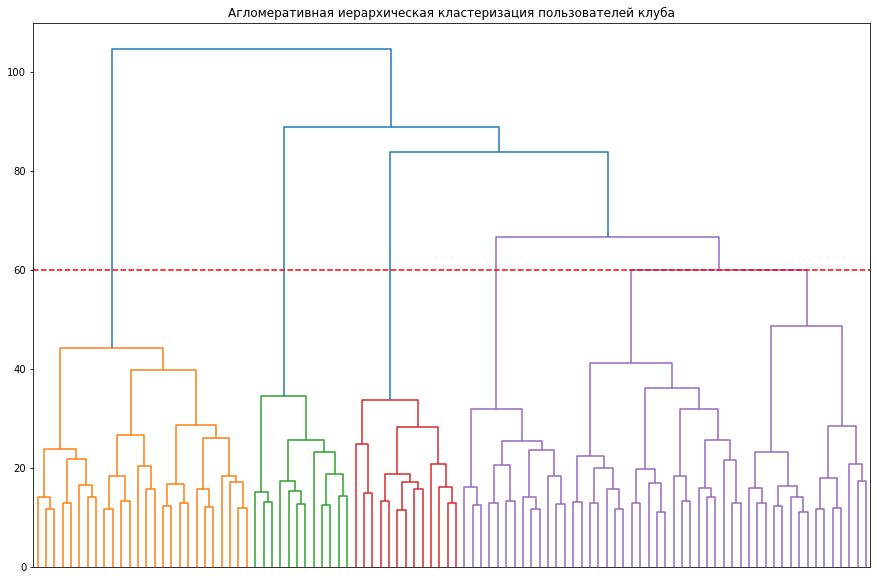

In [29]:
# отрисуем дендрограмму
fig, ax1 = plt.subplots(figsize=(15, 10))  
dendrogram(
    linked_matrix, 
    p=100,
    truncate_mode='lastp',
    ax=ax1,
    no_labels=True,
    orientation='top'
)
ax1.hlines(60, 0, 1000, color = 'r', linestyles='--')
plt.title('Агломеративная иерархическая кластеризация пользователей клуба')
plt.show() 

Метод агломеративной иерархической кластеризации посчитал, что оптимальное количество кластеров равно 4 (по количеству использованных цветов). Тем не менее, самый правый, фиолетовый кластер имеет большой объём и его представляется целесообразным декомпозировать. Проведём сечение по уровню расстояний 60, как показано на рисунке выше. В результате получим 5 кластеров (считаем ветви выше линии), будем полагать данное количество оптимальным.

Проведём физическую кластеризацию клиентов на 5 кластеров с использованием модели K-Means:

In [30]:
# разделим клиентов на 5 кластеров
km_model = KMeans(n_clusters=5, random_state=0)

# спрогнозируем кластеры
cl_labels = km_model.fit_predict(X_scaled)

# посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_scaled, cl_labels)))

Silhouette_score: 0.14


Метрика силуэта по определению принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация. Полученное значение 0.14 позволяет считать, что качество кластеризации выше среднего.

Дополним таблицу `gym_churn` данными о кластерах, к которым отнесла пользователей модель K-Means:

In [31]:
# сохраним разбиение на кластеры в исходный датафрейм
gym_churn['claster_id'] = cl_labels
gym_churn.sample(10).T

,3501,3538,2083,1009,3840,1929,3949,2489,772,3965
gender,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
near_location,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
partner,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
promo_friends,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
phone,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
contract_period,12.000000,1.000000,6.000000,1.000000,12.000000,1.000000,1.000000,12.000000,1.000000,1.000000
group_visits,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
age,30.000000,30.000000,29.000000,27.000000,29.000000,31.000000,27.000000,26.000000,30.000000,34.000000
avg_additional_charges_total,214.338562,31.326670,228.685944,37.618370,139.462631,250.321182,146.383713,199.501236,122.001389,219.671417
month_to_end_contract,11.000000,1.000000,6.000000,1.000000,12.000000,1.000000,1.000000,12.000000,1.000000,1.000000


Изучим средние значения признаков для каждого кластера. 

*Отметим*, что усреднение бинарных признаков показывает долю свершившихся фактов по данному признаку в каждом кластере.

Отсортируем полученную таблицу по убыванию доли оттока (признак `'churn'`):

In [32]:
gym_churn.groupby(by='claster_id').mean().sort_values(by='churn', 
                                                      ascending=False).T

claster_id,3,2,1,4,0
gender,0.485737,0.495050,0.522078,0.559666,0.502970
near_location,1.000000,0.000000,0.862338,0.976134,0.959406
partner,0.350238,0.463366,0.470130,0.356802,0.783168
promo_friends,0.240095,0.079208,0.306494,0.230310,0.574257
phone,1.000000,1.000000,0.000000,0.998807,1.000000
contract_period,1.948494,2.352475,4.787013,2.669451,10.889109
group_visits,0.341521,0.215842,0.425974,0.473747,0.542574
age,28.167987,28.477228,29.301299,30.125298,29.982178
avg_additional_charges_total,131.622208,135.457504,143.957657,161.657898,160.761017
month_to_end_contract,1.856577,2.198020,4.475325,2.459427,9.954455


Из полученной таблицы средних значений для каждого кластера следует:
- кластеры поделились на 2 группы - со сравнительно высокой (кластеры 3 и 2) и низкой (кластеры 1, 4 и 0) долей оттока;
- признак `near_location` следует считать несущественным при оценке оттока, поскольку в 3 кластере с самой высокой долей оттока все кленты живут или работают в районе финнес-центра, во 2 кластере (достаточно высокая доля оттока) никто не живёт или работает рядом с финнес-центром, а в остальных кластерах доля близко живущих составляет от 86 до 96 %;
- примерно то же самое можно сказать и о признаках `phone`, `month_to_end_contract`;
- ***в кластерах с повышенной долей оттока:***
    - доля клиентов мужского пола ниже;
    - меньшее количество клиентов пришло в рамках партнёрских программ;
    - велика доля коротких абонементов длительностью 1 месяц;
    - средний возраст ниже - 28 лет;
    - клиенты реже посещают групповые занятия;
    - их "стаж" в клубе в среднем невелик;
    - они мало занимаютсч в течение недели (в среднем 1-2 раза);
    - реже покупают дополнительные услуги в клубе;
- ***в кластерах с пониженной долей оттока:***
    - выше доля клиентов мужского пола;
    - клиенты чаще приходят в рамках партнёрских программ и "приведи друга";
    - средний возраст клиентов выше - 30 лет;
    - чаще покупают абонементы длительностью 6-12 месяцев;
    - чаще посещают групповые тренировки;
    - велика доля "проверенных" клиентов, которые давно пришли в клуб;
    - чаще занимаются в течение недели (в среднем 2-3 раза);
    - больше тратят на дополнительные услуги.
    
    
Рассмотрим подробнее целевые для работы маркетологов кластеры с максимальным оттоком - номер 3 и 2:
1. кластер 3:
    - отток максимальный - свыше 51 %;
    - клиентов мужского пола меньше - около 48 %;
    - средний возраст 28 лет;
    - пришли в клуб в среднем 2 месяца назад;
    - все клиенты живут или работают недалеко от фитнес-центра;
    - малое количество занимается по партнёрским программам (35 %) и программе "приведи друга" (24 %);
    - средняя длительность абонемента, как и его остаток, около 2 месяцев говорит о преобладании в группе абонементов на 1 месяц;
    - редко (34 %) посещают групповые тренировки;
    - на примере последнего месяца тренируются в среднем 1 раз в неделю;
2. кластер 2:
    - отток несколько ниже, чем в кластере 3, - свыше 49 %;
    - клиентов мужского пола меньше - около 49 %;
    - средний возраст 28 лет;
    - пришли в клуб в среднем около 3 месяцев назад;
    - все клиенты живут или работают далеко от фитнес-центра;
    - в среднем большее, по сравнению с кластером 3, количество клиентов занимается по партнёрским программам (46 %);
    - очень малая доля клиентов пришла по программе "приведи друга" (8 %);
    - средняя длительность абонемента, как и его остаток, около 2 месяцев говорит о преобладании в группе абонементов на 1 месяц;
    - редко (22 %) посещают групповые тренировки;
    - на примере последнего месяца тренируются в среднем 1.5 раза в неделю.


Для сравнения опишем кластер с минимальным оттоком - номер 0:
- отток минимальный - около 3 %;
- клиентов мужского и женского пола примерно поровну;
- средний возраст около 30 лет;
- пришли в клуб в среднем 5 месяцев назад;
- подавляющее большинство (около 96 %) клиентов живут или работают недалеко от фитнес-центра;
- большое количество занимается по партнёрским программам (78 %) и программе "приведи друга" (57 %);
- средняя длительность абонемента около 11 месяцев, его остаток - около 10 месяцев, что говорит о преобладании в группе абонементов на 12 месяцев;
- довольно часто (в 54 % случаев) посещают групповые тренировки;
- на примере последнего месяца тренируются в среднем 2 раза в неделю.


Воспользуемся написанной функцией визуализации распределений и взглянем на распределения признаков по кластерам:

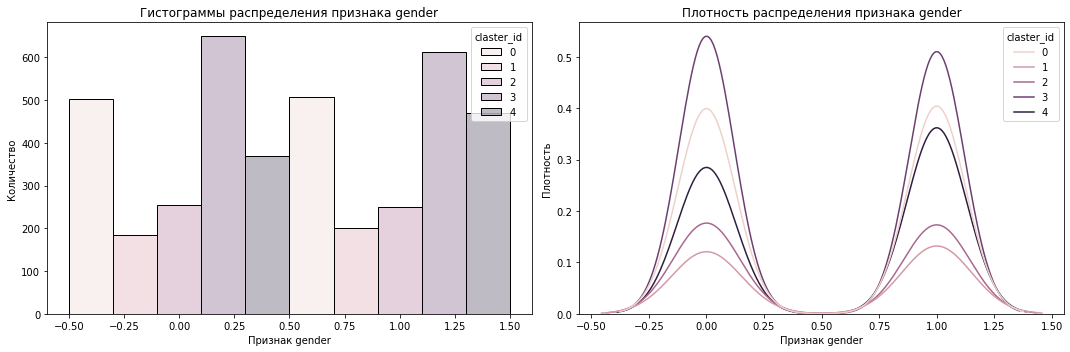

C:\Users\DR_analytics\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


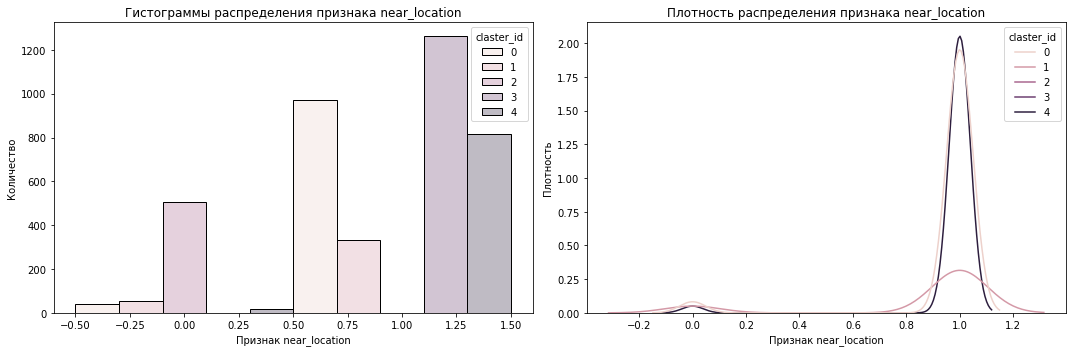

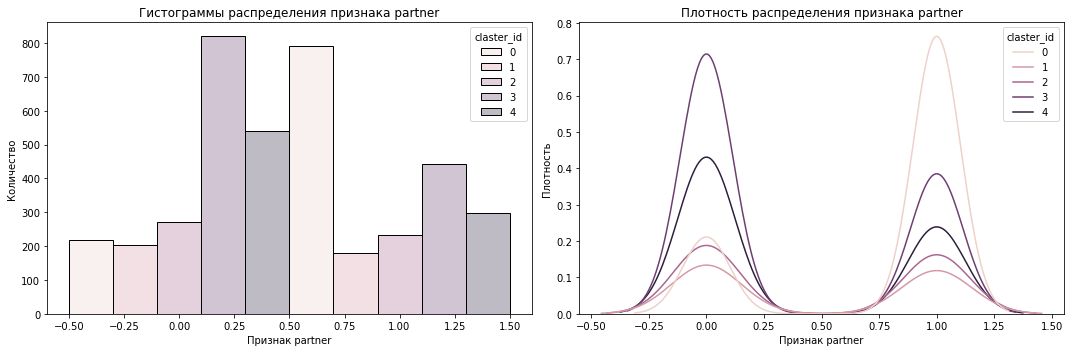

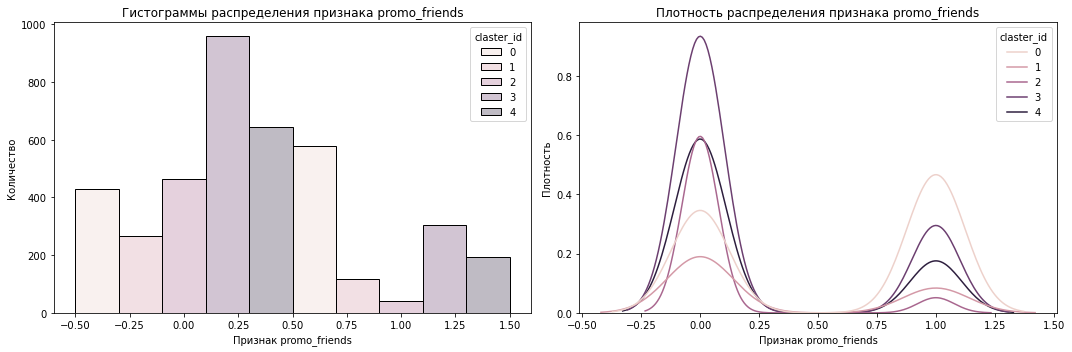

C:\Users\DR_analytics\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


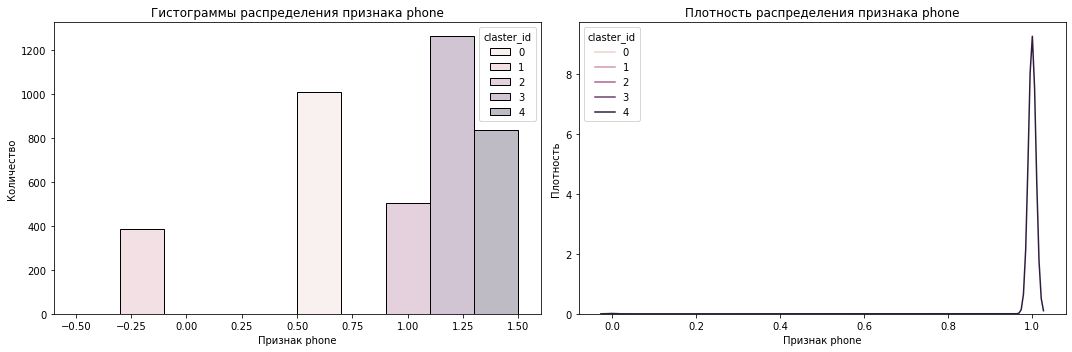

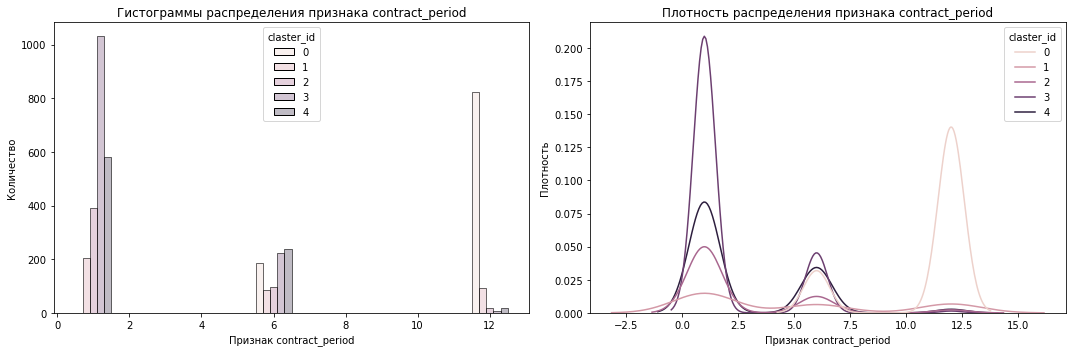

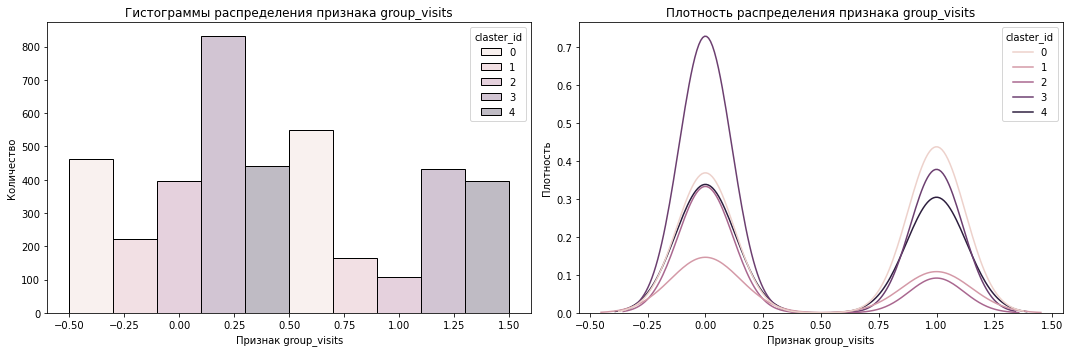

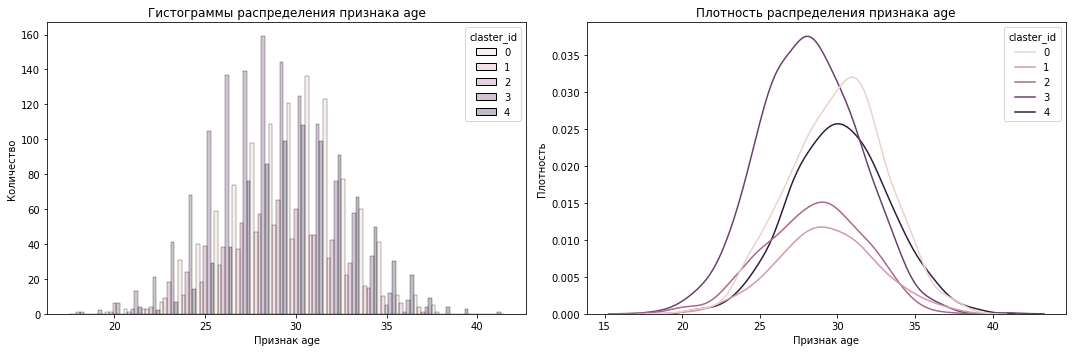

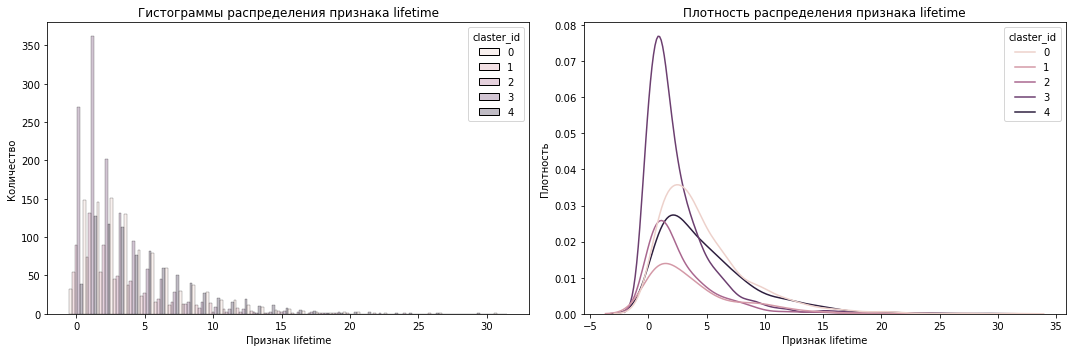

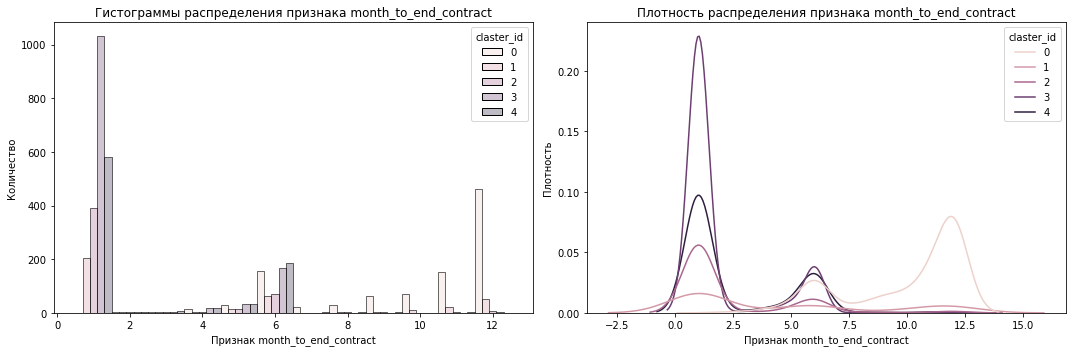

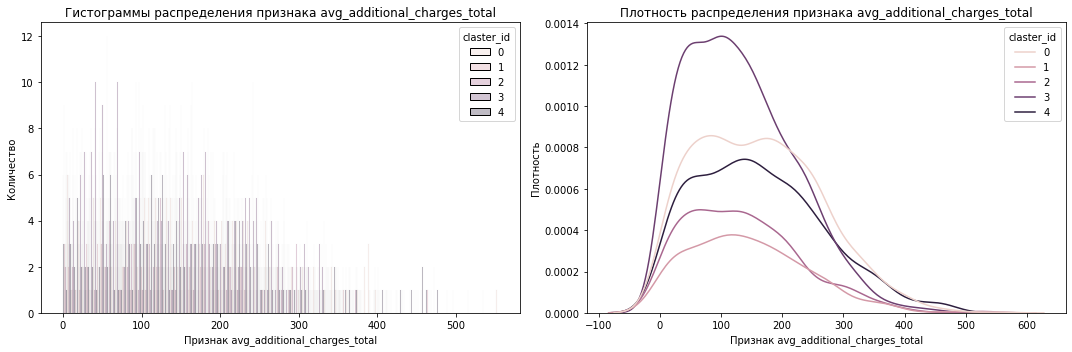

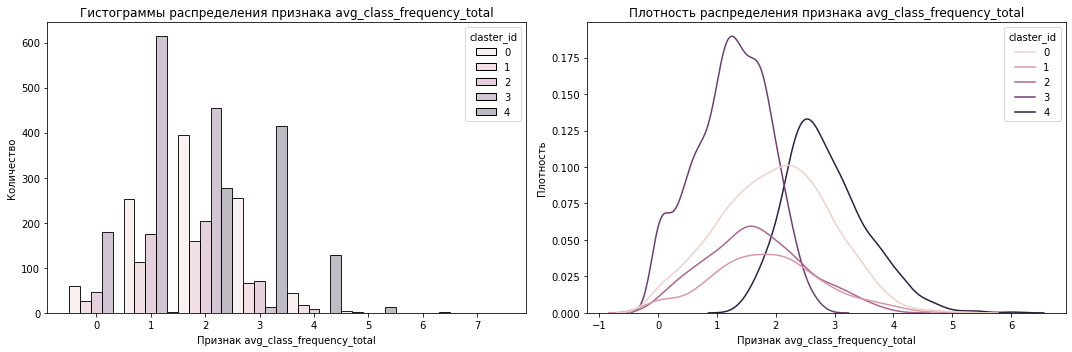

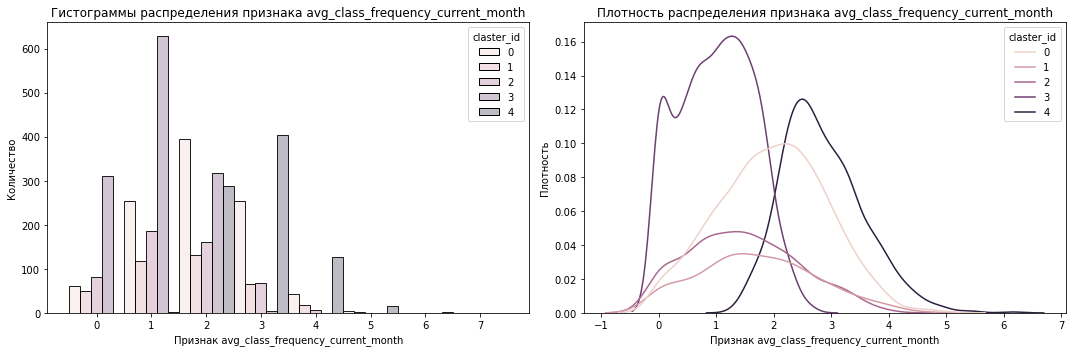

In [33]:
for feature in discrete_features:
    show_distribution(gym_churn, col=feature, hue='claster_id', discrete=True, 
                      figsize=(15, 5), multiple='dodge')

for feature in float_features:
    show_distribution(gym_churn, col=feature, hue='claster_id',
                      discrete=False, figsize=(15, 5), multiple='dodge')

Гистограммы и графики плотности распределений признаков по кластера подтверждают сделанные ранее описательные "портреты" пользователей, в большей и меньшей степени склонных к оттоку. 

### Выводы

В ходе кластеризации клиентов сети фитнес-центров мы решали задачу группировки клиентов по похожести признаков, среди которых был и главный интересующий бизнес признак оттока клиентов.

1. Задача кластеризации решалась с применением популярной модели К-means, количество классов для которой определялось путём моделирования дендрограммы на основе матрицы расстояний.


2. Алгоритм моделирования дендрограммы определил, что оптимальным является разбиение на 4 кластера, однако в силу большого объёма одного из них было принято решение разбить наблюдения на 5 кластеров.


3. Посчитанное в ходе применения модели кластеризации К-means значение метрики силуэта составило 0.14, что позволило считать, что качество кластеризации выше среднего.


4. Полученные кластеры были разделены на 2 группы - с повышенной и пониженной долей оттока клиентов.


5. Для каждой группы составлен описательный "портрет" клиентов:
- ***в кластерах с повышенной долей оттока:***
    - доля клиентов мужского пола ниже;
    - меньшее количество клиентов пришло в рамках партнёрских программ;
    - велика доля коротких абонементов длительностью 1 месяц;
    - средний возраст ниже - 28 лет;
    - клиенты реже посещают групповые занятия;
    - их "стаж" в клубе в среднем невелик;
    - они мало занимаются в течение недели (в среднем 1-2 раза);
    - реже покупают дополнительные услуги в клубе;
- ***в кластерах с пониженной долей оттока:***
    - выше доля клиентов мужского пола;
    - клиенты чаще приходят в рамках партнёрских программ и "приведи друга";
    - средний возраст клиентов выше - 30 лет;
    - чаще покупают абонементы длительностью 6-12 месяцев;
    - чаще посещают групповые тренировки;
    - велика доля "проверенных" клиентов, которые давно пришли в клуб;
    - чаще занимаются в течение недели (в среднем 2-3 раза);
    - больше тратят на дополнительные услуги.
    

6. Изучение распределений признаков по классам подтвердило составленные портреты.

---

## Общий вывод исследования и рекомендации

В ходе исследования решены его основные задачи:
- выбрана и обучена модель для прогнозирования вероятности оттока (на уровне следующего месяца) для каждого клиента;
- описаны типичные портреты клиентов, в большей или меньшей степени склонных к оттоку; 
- проанализированы основные признаки, наиболее сильно влияющие на отток;


Основные результаты приведены в выводах к соответствующим разделам отчёта. Сформулируем общие выводы и разработаем базовые рекомендации по повышению качества работы с клиентами.


1. Наиболее показательной с точки зрения бизнеса метрикой оценки качества пронозирования оттока признана метрика `precision`. 


2. Результаты проведённой валидации моделей показали, что ***лучше с задачей предсказания оттока пользователей справилась модель логистической регрессии***.


3. Наиболее значимым признаком для прогнозирования оттока клиента является ***среднее количество тренировок в неделю за последний месяц (avg_class_frequency_current_month)***.


4. Задача кластеризации решалась с применением популярной модели К-means, количество классов для которой определялось путём моделирования дендрограммы на основе матрицы расстояний.


5. Алгоритм моделирования дендрограммы определил, что оптимальным является разбиение на 4 кластера, однако в силу большого объёма одного из них было принято решение разбить наблюдения на 5 кластеров.


6. Полученные кластеры были разделены на 2 группы - с повышенной и пониженной долей оттока клиентов.


7. Для каждой группы составлен описательный "портрет" клиентов:
- ***в кластерах с повышенной долей оттока:***
    - доля клиентов мужского пола ниже;
    - меньшее количество клиентов пришло в рамках партнёрских программ;
    - велика доля коротких абонементов длительностью 1 месяц;
    - средний возраст ниже - 28 лет;
    - клиенты реже посещают групповые занятия;
    - их "стаж" в клубе в среднем невелик;
    - они мало занимаются в течение недели (в среднем 1-2 раза);
    - реже покупают дополнительные услуги в клубе;
- ***в кластерах с пониженной долей оттока:***
    - выше доля клиентов мужского пола;
    - клиенты чаще приходят в рамках партнёрских программ и "приведи друга";
    - средний возраст клиентов выше - 30 лет;
    - чаще покупают абонементы длительностью 6-12 месяцев;
    - чаще посещают групповые тренировки;
    - велика доля "проверенных" клиентов, которые давно пришли в клуб;
    - чаще занимаются в течение недели (в среднем 2-3 раза);
    - больше тратят на дополнительные услуги.


**Общие рекомендации для бизнеса на основе полученных результатов:**

1. Для клиентов из групп с повышенной долей оттока:
    1. Для снижения оттока целесообразно:
        - продвигать индивидуальные и групповые тренировки с тренером (с большой долей вероятности в отток уходят начинающие клиенты, которые пришли в клуб попробовать свои силы, купили короткий абонемент и редко посещают зал), возможно, предложить несколько тренировок бесплатно, или скидку;
        - стимулировать первичную покупку длинных абонементов (скидки, акции, дополнительные услуги, включённые в абонемент) - начинающие редко сразу покупают длительный доступ, рассчитывая, если не понравится, ограничить финансовые потери;
    2. Другие особенности взаимодействия с клиентами:
        - возможно, пересмотреть условия партнёрских программ и "приведи друга" с целью повышения притока мотивированных новых клиентов.


2. Для клиентов из групп с пониженной долей оттока (как правило, это мотивированные клиенты, которые давно занимаются в клубе):
    - для поддержания мотивации целесообразно рассмотреть изменение/расширение перечня дополнительных услуг, предоставляемых в клубе;
    - провести анкетирование/опрос на предмет выявленя интереса в новых видах индивидуальных тренировок и программ;
    - мотивировать клиентов делиться опытом и приводить друзей (скидки на длинные абонементы и т.д.).